In [1]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pitching_path = 'baseball_pitching/data/'
hitting_path = 'baseball_hitting/data/'

# Data Exploration, Merging data

In [3]:
poi = pd.read_csv(pitching_path + 'poi/poi_metrics.csv')

In [4]:
metadata = pd.read_csv(pitching_path + 'metadata.csv')

In [5]:
poi.columns

Index(['session_pitch', 'session', 'p_throws', 'pitch_type', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp', 'elbow_pronation_fp',
       'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_

In [6]:
metadata.columns

Index(['user', 'session', 'session_pitch', 'session_mass_kg',
       'session_height_m', 'age_yrs', 'playing_level', 'pitch_speed_mph',
       'filename_new', 'modelname_new'],
      dtype='object')

In [7]:
metadata.drop(columns=['user', 'session', 'pitch_speed_mph', 'filename_new', 'modelname_new'], axis=1, inplace=True)

In [8]:
poi_metadata = poi.merge(metadata, on='session_pitch', how='left')
poi_metadata

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620,110.6784,1.9304,21.40,college
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636,110.6784,1.9304,21.40,college
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333,101.1528,1.9304,19.41,college
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727,101.1528,1.9304,19.41,college
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719,101.1528,1.9304,19.41,college
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,3252,R,FF,80.8,4494.0446,2759.7142,1129.4168,42.9000,123.5448,...,141.5886,1685.4288,1891.2377,63.0494,6307.8100,72742.9029,88.4520,1.8796,20.38,college
407,3252_2,3252,R,FF,80.8,4550.4618,2742.8536,1129.4417,43.5008,123.5490,...,104.1382,1708.8564,1932.4776,61.7749,7850.2644,77906.1103,88.4520,1.8796,20.38,college
408,3252_3,3252,R,FF,80.8,4580.0385,2796.3719,1133.8676,43.7838,125.6560,...,86.2704,1647.5457,1858.1106,62.8667,16303.1697,77777.3331,88.4520,1.8796,20.38,college
409,3252_4,3252,R,FF,83.3,4638.4414,2815.9331,1119.5235,43.0352,127.5534,...,117.9198,1658.6645,1863.5780,63.3718,11758.9779,77382.0300,88.4520,1.8796,20.38,college


In [9]:
poi_metadata.p_throws = np.where(poi_metadata.p_throws == 'R', 1, 0)

In [10]:
level_encoding = {
    'high_school': 1,
    'college': 2,
    'independent': 3,
    'milb': 4
}
poi_metadata['playing_level'] = poi_metadata['playing_level'].replace(level_encoding)

In [11]:
poi_metadata.drop('pitch_type', axis=1, inplace=True)

In [12]:
poi_metadata.drop('session', axis=1, inplace=True)

<Axes: >

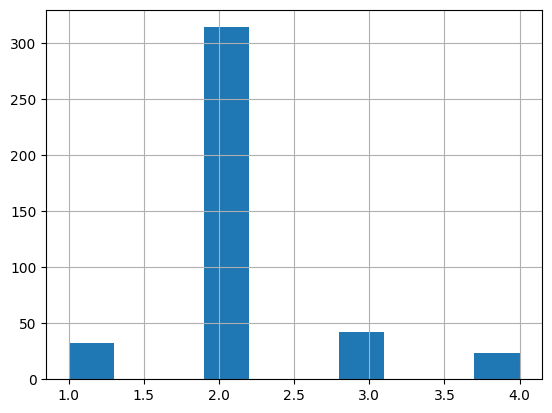

In [13]:
poi_metadata.playing_level.hist()

<Axes: >

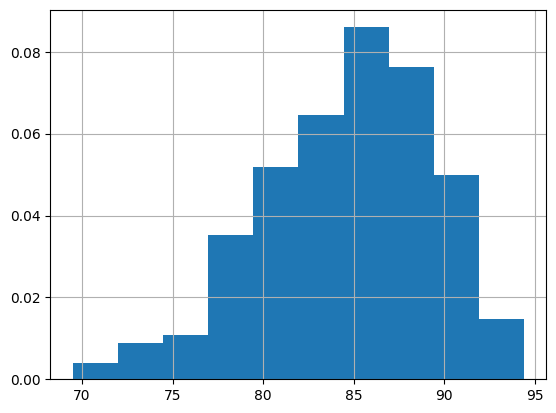

In [14]:
poi_metadata.pitch_speed_mph.hist(density=True)    

In [15]:
print(np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==1]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==2]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==3]),np.mean(poi_metadata.pitch_speed_mph[poi_metadata.playing_level==4]))

79.515625 84.73375796178344 85.94285714285715 89.24782608695651


In [16]:
pitching_full_sig_path = pitching_path + 'full_sig/'
energy_flow = pd.read_csv(pitching_full_sig_path + 'energy_flow.csv')
force_plate = pd.read_csv(pitching_full_sig_path + 'force_plate.csv')
forces_moments = pd.read_csv(pitching_full_sig_path + 'forces_moments.csv')
joint_angles = pd.read_csv(pitching_full_sig_path + 'joint_angles.csv')
joint_velos = pd.read_csv(pitching_full_sig_path + 'joint_velos.csv')
landmarks = pd.read_csv(pitching_full_sig_path + 'landmarks.csv')

In [17]:
energy_flow.columns

Index(['session_pitch', 'time', 'rear_knee_energy_transfer_stp',
       'rear_knee_energy_transfer_jfp', 'rear_knee_energy_generated',
       'lead_knee_energy_transfer_stp', 'lead_knee_energy_transfer_jfp',
       'lead_knee_energy_generated', 'rear_hip_energy_transfer_stp',
       'rear_hip_energy_transfer_jfp', 'rear_hip_energy_generated',
       'lead_hip_energy_transfer_stp', 'lead_hip_energy_transfer_jfp',
       'lead_hip_energy_generated', 'elbow_energy_transfer_stp',
       'elbow_energy_transfer_jfp', 'elbow_energy_generated',
       'glove_elbow_energy_transfer_stp', 'glove_elbow_energy_transfer_jfp',
       'glove_elbow_energy_generated', 'shoulder_energy_transfer_stp',
       'shoulder_energy_transfer_jfp', 'shoulder_energy_generated',
       'glove_shoulder_energy_transfer_stp',
       'glove_shoulder_energy_transfer_jfp', 'glove_shoulder_energy_generated',
       'glove_upper_arm_dist_seg_pwr', 'glove_upper_arm_prox_seg_pwr',
       'glove_forearm_dist_seg_pwr', 'glove_f

In [18]:
force_plate.columns

Index(['session_pitch', 'time', 'rear_force_x', 'rear_force_y', 'rear_force_z',
       'lead_force_x', 'lead_force_y', 'lead_force_z', 'pkh_time',
       'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object')

In [19]:
forces_moments.columns

Index(['session_pitch', 'time', 'rear_ankle_moment_x', 'rear_ankle_moment_y',
       'rear_ankle_moment_z', 'elbow_moment_x', 'elbow_moment_y',
       'elbow_moment_z', 'rear_hip_rear_thigh_moment_x',
       'rear_hip_rear_thigh_moment_y',
       ...
       'glove_shoulder_thorax_force_z', 'glove_wrist_force_x',
       'glove_wrist_force_y', 'glove_wrist_force_z', 'pkh_time', 'fp_10_time',
       'fp_100_time', 'MER_time', 'BR_time', 'MIR_time'],
      dtype='object', length=104)

In [20]:
joint_angles.columns

Index(['session_pitch', 'time', 'rear_ankle_angle_x', 'rear_ankle_angle_y',
       'rear_ankle_angle_z', 'elbow_angle_x', 'elbow_angle_y', 'elbow_angle_z',
       'rear_hip_angle_x', 'rear_hip_angle_y', 'rear_hip_angle_z',
       'rear_knee_angle_x', 'rear_knee_angle_y', 'rear_knee_angle_z',
       'shoulder_angle_x', 'shoulder_angle_y', 'shoulder_angle_z',
       'wrist_angle_x', 'wrist_angle_y', 'wrist_angle_z', 'pelvis_angle_x',
       'pelvis_angle_y', 'pelvis_angle_z', 'lead_ankle_angle_x',
       'lead_ankle_angle_y', 'lead_ankle_angle_z', 'glove_elbow_angle_x',
       'glove_elbow_angle_y', 'glove_elbow_angle_z', 'lead_hip_angle_x',
       'lead_hip_angle_y', 'lead_hip_angle_z', 'lead_knee_angle_x',
       'lead_knee_angle_y', 'lead_knee_angle_z', 'glove_shoulder_angle_x',
       'glove_shoulder_angle_y', 'glove_shoulder_angle_z',
       'glove_wrist_angle_x', 'glove_wrist_angle_y', 'glove_wrist_angle_z',
       'torso_angle_x', 'torso_angle_y', 'torso_angle_z',
       'torso_pe

In [21]:
joint_velos.columns

Index(['session_pitch', 'time', 'elbow_velo_x', 'elbow_velo_y', 'elbow_velo_z',
       'rear_hip_velo_x', 'rear_hip_velo_y', 'rear_hip_velo_z',
       'rear_knee_velo_x', 'rear_knee_velo_y', 'rear_knee_velo_z',
       'shoulder_velo_x', 'shoulder_velo_y', 'shoulder_velo_z', 'wrist_velo_x',
       'wrist_velo_y', 'wrist_velo_z', 'pelvis_velo_x', 'pelvis_velo_y',
       'pelvis_velo_z', 'glove_elbow_velo_x', 'glove_elbow_velo_y',
       'glove_elbow_velo_z', 'lead_hip_velo_x', 'lead_hip_velo_y',
       'lead_hip_velo_z', 'lead_knee_velo_x', 'lead_knee_velo_y',
       'lead_knee_velo_z', 'glove_shoulder_velo_x', 'glove_shoulder_velo_y',
       'glove_shoulder_velo_z', 'glove_wrist_velo_x', 'glove_wrist_velo_y',
       'glove_wrist_velo_z', 'torso_velo_x', 'torso_velo_y', 'torso_velo_z',
       'torso_pelvis_velo_x', 'torso_pelvis_velo_y', 'torso_pelvis_velo_z',
       'pkh_time', 'fp_10_time', 'fp_100_time', 'MER_time', 'BR_time',
       'MIR_time'],
      dtype='object')

In [22]:
landmarks.columns

Index(['session_pitch', 'time', 'rear_ankle_jc_x', 'rear_ankle_jc_y',
       'rear_ankle_jc_z', 'rear_hip_x', 'rear_hip_y', 'rear_hip_z',
       'elbow_jc_x', 'elbow_jc_y', 'elbow_jc_z', 'hand_jc_x', 'hand_jc_y',
       'hand_jc_z', 'rear_knee_jc_x', 'rear_knee_jc_y', 'rear_knee_jc_z',
       'shoulder_jc_x', 'shoulder_jc_y', 'shoulder_jc_z', 'wrist_jc_x',
       'wrist_jc_y', 'wrist_jc_z', 'lead_ankle_jc_x', 'lead_ankle_jc_y',
       'lead_ankle_jc_z', 'lead_hip_x', 'lead_hip_y', 'lead_hip_z',
       'glove_elbow_jc_x', 'glove_elbow_jc_y', 'glove_elbow_jc_z',
       'glove_hand_jc_x', 'glove_hand_jc_y', 'glove_hand_jc_z',
       'lead_knee_jc_x', 'lead_knee_jc_y', 'lead_knee_jc_z',
       'glove_shoulder_jc_x', 'glove_shoulder_jc_y', 'glove_shoulder_jc_z',
       'glove_wrist_jc_x', 'glove_wrist_jc_y', 'glove_wrist_jc_z',
       'thorax_ap_x', 'thorax_ap_y', 'thorax_ap_z', 'thorax_dist_x',
       'thorax_dist_y', 'thorax_dist_z', 'thorax_prox_x', 'thorax_prox_y',
       'thorax_prox_z

In [23]:
print(len(poi_metadata),len(energy_flow),len(force_plate),len(forces_moments),len(joint_angles),len(joint_velos),len(landmarks))

411 247709 727824 247709 247709 247709 247709


In [24]:
columns = []
for col in force_plate.columns:
    if col in energy_flow.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = energy_flow.merge(force_plate.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [25]:
columns = []
for col in forces_moments.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(forces_moments.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [26]:
columns = []
for col in joint_angles.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_angles.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [27]:
columns = []
for col in joint_velos.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(joint_velos.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [28]:
columns = []
for col in landmarks.columns:
    if col in merged.columns and col not in ['session_pitch','time']:
        columns.append(col)
# force_plate.drop(columns=columns, axis=1, inplace=True)
merged = merged.merge(landmarks.drop(columns=columns, axis=1), on = ['session_pitch','time'], how='left')

In [29]:
merged

,session_pitch,time,rear_knee_energy_transfer_stp,rear_knee_energy_transfer_jfp,rear_knee_energy_generated,lead_knee_energy_transfer_stp,lead_knee_energy_transfer_jfp,lead_knee_energy_generated,rear_hip_energy_transfer_stp,rear_hip_energy_transfer_jfp,...,thorax_ap_z,thorax_dist_x,thorax_dist_y,thorax_dist_z,thorax_prox_x,thorax_prox_y,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z
0,1031_2,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6123,0.1213,-0.1545,1.3509,0.1147,-0.1729,1.6184,0.1148,-0.1556,1.1440
1,1031_2,0.0028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.6124,0.1218,-0.1547,1.3510,0.1152,-0.1731,1.6184,0.1167,-0.1562,1.1458
2,1031_2,0.0056,45.3350,20.1973,-8.0818,17.7538,6.0121,44.9851,0.1649,19.1142,...,1.6125,0.1221,-0.1549,1.3511,0.1156,-0.1733,1.6184,0.1169,-0.1563,1.1459
3,1031_2,0.0083,38.2959,19.3669,-8.7513,14.0252,4.4715,34.3861,0.0000,18.4929,...,1.6126,0.1224,-0.1551,1.3512,0.1160,-0.1736,1.6185,0.1171,-0.1564,1.1459
4,1031_2,0.0111,31.5861,18.5402,-9.5193,10.4432,3.0432,24.3333,0.0000,17.8197,...,1.6127,0.1227,-0.1553,1.3512,0.1163,-0.1738,1.6186,0.1173,-0.1566,1.1460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,-65.5371,-174.4923,10.9729,-101.9002,25.9129,-321.7640,0.0000,-284.1946,...,1.2854,1.5113,-0.0011,1.1167,1.6018,0.1272,1.2994,1.4461,-0.0296,0.9630
247705,3252_5,1.7556,-57.7275,-163.6167,9.1722,-101.9734,26.6900,-320.3218,0.0000,-277.5526,...,1.2879,1.5129,0.0010,1.1187,1.6033,0.1291,1.3020,1.4480,-0.0290,0.9657
247706,3252_5,1.7583,-53.0746,-157.1646,8.0998,-102.0185,27.1232,-319.4924,0.0000,-273.6412,...,1.2901,1.5144,0.0030,1.1206,1.6048,0.1308,1.3044,1.4500,-0.0285,0.9682
247707,3252_5,1.7611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.2920,1.5159,0.0049,1.1222,1.6063,0.1323,1.3065,1.4520,-0.0279,0.9703


In [30]:
for col in merged.columns:
    if col in poi_metadata.columns:
        print(col)

session_pitch


In [31]:
all_merged = poi_metadata.merge(merged.drop(columns=columns, axis=1), on = 'session_pitch', how='left')

In [32]:
all_merged['order'] = all_merged.groupby('session_pitch').cumcount() + 1
all_merged.order

0           1
1           2
2           3
3           4
4           5
         ... 
247704    632
247705    633
247706    634
247707    635
247708    636
Name: order, Length: 247709, dtype: int64

In [33]:
poi_metadata[poi_metadata.isna().any(axis=1)]

,session_pitch,p_throws,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,max_shoulder_external_rotation,elbow_flexion_fp,...,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead,session_mass_kg,session_height_m,age_yrs,playing_level
15,1370_1,1,87.8,4378.9195,2233.9898,1152.4505,28.4991,106.6919,156.3049,95.9804,...,NaN,NaN,NaN,NaN,NaN,NaN,104.3280,1.9050,23.43,3
191,2857_4,1,72.9,4815.1804,2386.8824,877.5712,40.6763,96.2136,165.2810,52.6094,...,NaN,NaN,NaN,NaN,NaN,NaN,69.4008,1.8542,18.85,2
247,2919_2,1,82.6,4924.3223,2775.5162,951.6221,28.8214,132.7934,182.2818,90.9193,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
248,2919_3,1,84.0,4812.6796,2720.4570,985.4787,29.6014,134.5015,184.0617,93.9795,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
249,2919_4,1,82.6,4847.2724,2766.5142,954.6934,28.7634,134.0515,183.6061,92.7248,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
250,2919_5,1,82.6,4991.7229,2821.7158,953.1706,28.0776,132.8751,184.1284,93.9730,...,NaN,NaN,NaN,NaN,NaN,NaN,84.8232,1.9050,18.80,2
251,2923_1,1,78.9,4250.3573,2077.3878,1062.1852,21.4589,101.8802,151.2197,91.0276,...,NaN,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2
252,2923_2,1,76.4,4292.0506,2071.5214,1088.3251,22.0308,100.8572,152.0982,91.2621,...,NaN,NaN,NaN,NaN,NaN,NaN,73.4832,1.7780,20.09,2


In [34]:
poi_metadata.dropna(inplace=True)

# POI Metadata

Train-test split

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [489]:
poi_train, poi_test, mph_train, mph_test = train_test_split(poi_metadata.drop(columns=['pitch_speed_mph']), poi_metadata.pitch_speed_mph, test_size=0.2, random_state=42)
poi_train, poi_val, mph_train, mph_val = train_test_split(poi_train, mph_train, test_size=0.2, random_state=42)

In [490]:
poi_train = poi_train.reset_index().drop(columns='index', axis=1)
poi_val = poi_val.reset_index().drop(columns='index', axis=1)
mph_train = mph_train.reset_index().drop(columns='index', axis=1)
mph_val = mph_val.reset_index().drop(columns='index', axis=1)
poi_test = poi_test.reset_index().drop(columns='index', axis=1)
mph_test = mph_test.reset_index().drop(columns='index', axis=1)

In [491]:
x_train = poi_train.drop(columns=['session_pitch'])
x_val = poi_val.drop(columns=['session_pitch'])

linear_model = LinearRegression().fit(x_train,mph_train)
print('R^2: ' + str(linear_model.score(x_val,mph_val)))
predictions = linear_model.predict(x_val)
print('RMSE: ' + str(np.sqrt(mean_squared_error(mph_val, predictions))))

R^2: 0.6580810469227608
RMSE: 2.6862724926278787


In [492]:
linear_model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=1.0)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8425873633889961
RMSE: 1.8226709595016277


XGBoost is wayyyyy better

In [498]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)
x_val_standardized = scaler.transform(x_val)

linear_model = xgb.XGBRegressor(max_depth = 4, reg_lambda=1)
linear_model.fit(x_train_standardized, mph_train)

r_squared = linear_model.score(x_val_standardized, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val_standardized)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8734637701815637
RMSE: 1.6341650674264967


Standardizing makes literally no difference in performance, and it will hinder interpretability, so we will not do this.

In [499]:
landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
0,1031_2,0.0000,0.0719,-0.1806,0.0622,-0.0345,-0.1740,0.9830,-0.1766,-0.2383,...,1.6184,0.1148,-0.1556,1.1440,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
1,1031_2,0.0028,0.0720,-0.1806,0.0623,-0.0343,-0.1738,0.9832,-0.1764,-0.2382,...,1.6184,0.1167,-0.1562,1.1458,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
2,1031_2,0.0056,0.0719,-0.1806,0.0624,-0.0342,-0.1736,0.9833,-0.1762,-0.2380,...,1.6184,0.1169,-0.1563,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
3,1031_2,0.0083,0.0719,-0.1806,0.0624,-0.0341,-0.1734,0.9835,-0.1762,-0.2378,...,1.6185,0.1171,-0.1564,1.1459,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
4,1031_2,0.0111,0.0718,-0.1805,0.0624,-0.0341,-0.1732,0.9836,-0.1762,-0.2377,...,1.6186,0.1173,-0.1566,1.1460,0.625,1.1806,1.1917,1.3056,1.3389,1.3778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,0.7124,-0.4337,0.7062,1.4425,-0.2609,0.8528,1.4963,0.1718,...,1.2994,1.4461,-0.0296,0.9630,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247705,3252_5,1.7556,0.7193,-0.4447,0.7169,1.4456,-0.2594,0.8554,1.4979,0.1699,...,1.3020,1.4480,-0.0290,0.9657,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247706,3252_5,1.7583,0.7261,-0.4550,0.7268,1.4485,-0.2579,0.8577,1.4998,0.1686,...,1.3044,1.4500,-0.0285,0.9682,0.800,1.4139,1.4278,1.5500,1.5778,1.6139
247707,3252_5,1.7611,0.7325,-0.4643,0.7359,1.4514,-0.2565,0.8598,1.5018,0.1677,...,1.3065,1.4520,-0.0279,0.9703,0.800,1.4139,1.4278,1.5500,1.5778,1.6139


In [500]:
max_time_per_session = all_merged.groupby('session_pitch')['time'].max().reset_index()
idx = landmarks.groupby('session_pitch')['lead_knee_jc_z'].idxmax()
peak_leg_lift_time = landmarks.loc[idx, ['session_pitch', 'lead_knee_jc_z', 'time']].rename(columns={'time': 'peak_knee_time', 'lead_knee_jc_z': 'max_lead_knee_jc_z'}).reset_index(drop=True)
BR_FP_time = landmarks.groupby('session_pitch')[['BR_time', 'fp_10_time', 'fp_100_time']].max().reset_index()
timing_df = peak_leg_lift_time.merge(BR_FP_time, on='session_pitch', how='inner')
timing_df['peak_knee_to_BR_time'] = timing_df.BR_time - timing_df.peak_knee_time
timing_df['peak_knee_to_FS_time'] = timing_df.fp_10_time - timing_df.peak_knee_time
timing_df['peak_knee_to_FP_time'] = timing_df.fp_100_time - timing_df.peak_knee_time
timing_df['FS_to_BR_time'] = timing_df.BR_time - timing_df.fp_10_time
timing_df['FP_to_BR_time'] = timing_df.BR_time - timing_df.fp_100_time
timing_df = timing_df.merge(max_time_per_session, on='session_pitch', how='left').rename(columns={'time': 'total_time'})

timing_df

,session_pitch,max_lead_knee_jc_z,peak_knee_time,BR_time,fp_10_time,fp_100_time,peak_knee_to_BR_time,peak_knee_to_FS_time,peak_knee_to_FP_time,FS_to_BR_time,FP_to_BR_time,total_time
0,1031_2,1.1610,0.6250,1.3389,1.1806,1.1917,0.7139,0.5556,0.5667,0.1583,0.1472,1.5250
1,1031_3,1.1455,0.0917,0.8250,0.6639,0.6806,0.7333,0.5722,0.5889,0.1611,0.1444,1.0167
2,1097_1,1.2528,0.1056,1.0028,0.7722,0.8278,0.8972,0.6666,0.7222,0.2306,0.1750,1.1944
3,1097_2,1.3346,0.1722,1.0611,0.8528,0.8917,0.8889,0.6806,0.7195,0.2083,0.1694,1.2361
4,1097_3,1.3434,0.1472,1.0306,0.8361,0.8472,0.8834,0.6889,0.7000,0.1945,0.1834,1.2361
...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,1.1282,1.1250,1.9167,1.7556,1.7722,0.7917,0.6306,0.6472,0.1611,0.1445,2.0722
407,3252_2,1.1912,0.8583,1.6722,1.5111,1.5250,0.8139,0.6528,0.6667,0.1611,0.1472,1.8139
408,3252_3,1.1596,0.8944,1.6889,1.5306,1.5444,0.7945,0.6362,0.6500,0.1583,0.1445,1.8778
409,3252_4,1.1912,0.6250,1.4444,1.2861,1.3083,0.8194,0.6611,0.6833,0.1583,0.1361,1.6500


In [501]:
# Merge this information back into poi_metadata
poi_train_new = pd.merge(poi_train, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')
poi_val_new = pd.merge(poi_val, timing_df.drop(columns=['BR_time', 'fp_10_time', 'fp_100_time', 'peak_knee_time'], axis=1), on='session_pitch', how='left')

In [504]:
x_train = poi_train_new.drop(columns=['session_pitch'])
x_val = poi_val_new.drop(columns=['session_pitch'])
linear_model = xgb.XGBRegressor(max_depth = 6, reg_lambda=1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8857845198794317
RMSE: 1.552569185443535


In [505]:
from scipy import stats
import statsmodels.api as sm

In [506]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
48,elbow_transfer_fp_br,0.330865
64,thorax_distal_transfer_fp_br,0.127637
22,max_cog_velo_x,0.067107
44,max_shoulder_horizontal_abduction,0.051166
78,session_height_m,0.042647
...,...,...
51,lead_hip_transfer_fp_br,0.000026
65,rear_grf_x_max,0.000019
36,torso_lateral_tilt_br,0.000010
18,torso_rotation_fp,0.000010


In [507]:
model = sm.OLS(mph_train, x_train)
result = model.fit()

In [508]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9363.
Date:                Mon, 23 Oct 2023   Prob (F-statistic):                   8.32e-281
Time:                        20:48:09   Log-Likelihood:                         -419.22
No. Observations:                 257   AIC:                                      1010.
Df Residuals:                     171   BIC:                                      1316.
Df Model:                          86                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
p_throws                                     -1.7065      0.576     -2.962      0.003      -2.844      -0.569
max_shoulder_internal_rotational_velo        -0.0004      0.001     -0.604      0.546      -0.002       0.001
max_elbow_extension_velo                      0.0028      0.002      1.791      0.075      -0.000       0.006
max_torso_rotational_velo                     0.0253      0.004      6.678      0.000       0.018       0.033
max_rotation_hip_shoulder_separation         -0.0714      0.089     -0.800      0.425      -0.248       0.105
max_elbow_flexion                             0.1551      0.046      3.349      0.001       0.064       0.246
max_shoulder_external_rotation                0.0686      0.029      2.373      0.019       0.012       0.126
elbow_flexion_fp                             -0.0353      0.024     -1.442      0.151      -0.084       0.013
elbow_pronation_fp                           -0.0009      0.012     -0.074      0.941      -0.024       0.023
rotation_hip_shoulder_separation_fp           0.1615      0.159      1.016      0.311      -0.152       0.475
shoulder_horizontal_abduction_fp              0.0216      0.034      0.630      0.529      -0.046       0.089
shoulder_abduction_fp                         0.0930      0.031      3.009      0.003       0.032       0.154
shoulder_external_rotation_fp                -0.0646      0.017     -3.905      0.000      -0.097      -0.032
lead_knee_extension_angular_velo_fp          -0.0007      0.001     -0.540      0.590      -0.003       0.002
lead_knee_extension_angular_velo_br           0.0039      0.002      1.923      0.056      -0.000       0.008
lead_knee_extension_angular_velo_max         -0.0027      0.002     -1.319      0.189      -0.007       0.001
torso_anterior_tilt_fp                        0.1338      0.043      3.137      0.002       0.050       0.218
torso_lateral_tilt_fp                        -0.0340      0.051     -0.667      0.506      -0.135       0.067
torso_rotation_fp                             0.2485      0.177      1.406      0.161      -0.100       0.597
pelvis_anterior_tilt_fp                       0.1228      0.028      4.329      0.000       0.067       0.179
pelvis_lateral_tilt_fp                       -0.0250      0.055     -0.452      0.652      -0.134       0.084
pelvis_rotation_fp                           -0.0286      0.178     -0.161      0.872      -0.379       0.322
max_cog_velo_x                                1.5293      1.225      1.248      0.214      -0.889       3.948
torso_rotation_min                            0.0028      0.021      0.135      0.893      -0.039       0.044
max_pelvis_rot

In [509]:
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})

In [510]:
coef_df

,feature,coefficient,SE,t,p_value,[0.025,0.975]
0,p_throws,-1.7065,0.576,-2.962,0.003,-2.844,-0.569
1,max_shoulder_internal_rotational_velo,-0.0004,0.001,-0.604,0.546,-0.002,0.001
2,max_elbow_extension_velo,0.0028,0.002,1.791,0.075,-0.000,0.006
3,max_torso_rotational_velo,0.0253,0.004,6.678,0.000,0.018,0.033
4,max_rotation_hip_shoulder_separation,-0.0714,0.089,-0.800,0.425,-0.248,0.105
...,...,...,...,...,...,...,...
83,peak_knee_to_FS_time,-8.2524,7.253,-1.138,0.257,-22.569,6.064
84,peak_knee_to_FP_time,8.4296,7.155,1.178,0.240,-5.693,22.552
85,FS_to_BR_time,10.1752,7.190,1.415,0.159,-4.018,24.368
86,FP_to_BR_time,-6.5067,8.131,-0.800,0.425,-22.558,9.544


In [511]:
corr_matrix = x_train.corr()

# Create a DataFrame to store highly correlated pairs
high_corr_pairs = []
inter_features = []

# Iterate through the correlation matrix to find highly correlated pairs
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:  # assuming a threshold of 0.6 for high correlation
            colname = corr_matrix.columns[i] + '_int_' + corr_matrix.columns[j]  # Name of the new interaction column
            inter_features.append(colname)
            poi_train_new[colname] = poi_train_new[corr_matrix.columns[i]] * poi_train_new[corr_matrix.columns[j]]
            poi_val_new[colname] = poi_val_new[corr_matrix.columns[i]] * poi_val_new[corr_matrix.columns[j]]
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature1', 'Feature2', 'Correlation'])
high_corr_df

,Feature1,Feature2,Correlation
0,elbow_flexion_fp,max_elbow_flexion,0.796856
1,rotation_hip_shoulder_separation_fp,max_rotation_hip_shoulder_separation,0.912320
2,lead_knee_extension_angular_velo_max,lead_knee_extension_angular_velo_br,0.807743
3,pelvis_rotation_fp,torso_rotation_fp,0.839039
4,torso_rotation_mer,torso_anterior_tilt_mer,0.682533
5,shoulder_internal_rotation_moment,elbow_varus_moment,0.980438
6,torso_anterior_tilt_br,torso_anterior_tilt_mer,0.939138
7,torso_anterior_tilt_br,torso_rotation_mer,0.626818
8,torso_lateral_tilt_br,torso_lateral_tilt_mer,0.923954
9,torso_rotation_br,torso_rotation_mer,0.898598


In [512]:
x_train = poi_train_new.drop(columns=['session_pitch'])
x_val = poi_val_new.drop(columns=['session_pitch'])

In [515]:
linear_model = xgb.XGBRegressor(max_depth = 6, reg_lambda=1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8875581838277936
RMSE: 1.540467014290562


Helped performance

In [516]:
inter_model = sm.OLS(mph_train, x_train)
inter_result = inter_model.fit()

In [517]:
inter_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        pitch_speed_mph   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Mon, 23 Oct 2023   Prob (F-statistic):                   7.56e-206
Time:                        20:48:37   Log-Likelihood:                         -281.20
No. Observations:                 257   AIC:                                      842.4
Df Residuals:                     117   BIC:                                      1339.
Df Model:                         140                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                        -1.0726      0.641     -1.674      0.097      -2.342       0.196
max_shoulder_internal_rotational_velo                                           -0.0002      0.001     -0.337      0.737      -0.002       0.001
max_elbow_extension_velo                                                         0.0019      0.002      1.180      0.241      -0.001       0.005
max_torso_rotational_velo                                                        0.0129      0.004      3.017      0.003       0.004       0.021
max_rotation_hip_shoulder_separation                                             0.3128      0.149      2.104      0.038       0.018       0.607
max_elbow_flexion                                                                0.1793      0.171      1.050      0.296      -0.159       0.518
max_shoulder_external_rotation                                                   0.1401      0.038      3.690      0.000       0.065       0.215
elbow_flexion_fp                                                                -0.0041      0.193     -0.021      0.983      -0.385       0.377
elbow_pronation_fp                                                              -0.0079      0.013     -0.602      0.548      -0.034       0.018
rotation_hip_shoulder_separation_fp                                              0.1902      0.253      0.753      0.453      -0.310       0.691
shoulder_horizontal_abduction_fp                                                 0.1436      0.063      2.291      0.024       0.019       0.268
shoulder_abduction_fp                                                            0.0171      0.032      0.532      0.596      -0.047       0.081
shoulder_external_rotation_fp                                                   -0.0478      0.018     -2.651      0.009      -0.084      -0.012
lead_knee_extension_angular_velo_fp                                             -0.0012      0.001     -0.801      0.424      -0.004       0.002
lead_knee_extension_angular_velo_br                                              0.0153      0.005      3.002      0.003       0.005       0.025
lead_knee_extension_angular_velo_max                                            -0.0024      0.003     -0.730      0.467      -0.009       0.004
torso_anterior_tilt_fp                                                           0.0934      0.048      1.959      0.052      -0.001       0.188
torso_lateral_tilt_fp                                                           -0.0

In [518]:
summary_as_html = inter_result.summary().tables[1].as_html()
inter_coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

inter_coef_df = inter_coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = inter_coef_df.feature[(inter_coef_df.p_value<.1) & (~inter_coef_df.feature.isin(inter_features))]
# sig_features = sig_features[~sig_features.feature.isin(inter_features)]
sig_features.reset_index().feature

0                                 p_throws
1                max_torso_rotational_velo
2     max_rotation_hip_shoulder_separation
3           max_shoulder_external_rotation
4         shoulder_horizontal_abduction_fp
5            shoulder_external_rotation_fp
6      lead_knee_extension_angular_velo_br
7                   torso_anterior_tilt_fp
8                  pelvis_anterior_tilt_fp
9                           max_cog_velo_x
10             glove_shoulder_abduction_fp
11     glove_shoulder_external_rotation_fp
12            glove_shoulder_abduction_mer
13                       elbow_flexion_mer
14                  torso_lateral_tilt_mer
15                      elbow_varus_moment
16       shoulder_internal_rotation_moment
17                   torso_lateral_tilt_br
18                           stride_length
19                 shoulder_transfer_fp_br
20               shoulder_generation_fp_br
21                 lead_hip_transfer_fp_br
22              rear_hip_absorption_pkh_fp
23         

In [519]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
115,thorax_distal_transfer_fp_br_int_elbow_transfe...,3.518729e-01
64,thorax_distal_transfer_fp_br,1.399157e-01
48,elbow_transfer_fp_br,8.830034e-02
113,thorax_distal_transfer_fp_br_int_shoulder_inte...,3.601833e-02
141,FP_to_BR_time_int_FS_to_BR_time,2.502916e-02
...,...,...
121,lead_grf_z_max_int_shoulder_internal_rotation_...,1.696044e-08
117,rear_grf_mag_max_int_rear_grf_x_max,7.914645e-09
134,playing_level_int_age_yrs,0.000000e+00
139,peak_knee_to_FP_time_int_peak_knee_to_BR_time,0.000000e+00


In [520]:
importance_df[(importance_df.Feature.str.contains('FS')) | (importance_df.Feature.str.contains('FP'))]

,Feature,Importance
141,FP_to_BR_time_int_FS_to_BR_time,2.502916e-02
137,peak_knee_to_FS_time_int_peak_knee_to_BR_time,1.250517e-02
86,FP_to_BR_time,2.471836e-04
138,peak_knee_to_FP_time_int_cog_velo_pkh,1.240892e-04
136,peak_knee_to_FS_time_int_cog_velo_pkh,2.181343e-05
85,FS_to_BR_time,1.801126e-05
83,peak_knee_to_FS_time,1.098906e-06
84,peak_knee_to_FP_time,1.680337e-07
139,peak_knee_to_FP_time_int_peak_knee_to_BR_time,0.000000e+00
140,peak_knee_to_FP_time_int_peak_knee_to_FS_time,0.000000e+00


fp_10 (FS) seemingly less important than fp_100 (FP). Can leave them both in for now, but may consider taking one out later. FP had weird positive effecs in the OLS model above. Interaction term between FS to BR and FP to BR was very important. 

In [521]:
high_order_cols = []
for col in poi_train_new.columns:
    if col not in ['pitch_speed_mph', 'session_pitch']:
        if '_int_' not in col:
            poi_train_new[col + '_2'] = poi_train_new[col]**2
            poi_val_new[col + '_2'] = poi_val_new[col]**2
            high_order_cols.append(col + '_2')

In [522]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns='session_pitch')

In [533]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda=1.19)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8895632174235354
RMSE: 1.5266706280997


In [534]:
x_train=poi_train_new.drop(columns=['session_pitch']+high_order_cols, axis=1)
x_val = poi_val_new.drop(columns=['session_pitch']+high_order_cols, axis=1)

In [547]:
linear_model = xgb.XGBRegressor(max_depth = 6, reg_lambda=1.1)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8875581838277936
RMSE: 1.540467014290562


Higher order columns helped a bit. May consider taking out and being more intentional about which ones to put in later.

Shouldn't have pkh to BR. Should have pkh to FP and FP to BR. FP to BR is probably suffering from this

In [548]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)
for col in x_train.columns:
    if 'peak_knee_to_BR_time' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)

In [556]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda=1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8913510477607903
RMSE: 1.5142627834616855


Better, so will take out since it makes more sense and we have the better performance with less features.

In [557]:
for col in poi_train_new.columns:
    if 'peak_knee_to_BR_time' in col:
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)

In [558]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        pitch_speed_mph   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     33.25
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.40e-22
Time:                        20:52:45   Log-Likelihood:                -98.791
No. Observations:                 257   AIC:                             633.6
Df Residuals:                      39   BIC:                             1407.
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                         0.1289      0.832      0.155      0.878      -1.555       1.812
max_shoulder_internal_rotational_velo                                            0.0064      0.010      0.638      0.527      -0.014       0.027
max_elbow_extension_velo                                                        -0.0064      0.023     -0.280      0.781      -0.052       0.040
max_torso_rotational_velo                                                       -0.0037      0.095     -0.039      0.969      -0.195       0.188
max_rotation_hip_shoulder_separation                                             1.3364      0.936      1.428      0.161      -0.556       3.229
max_elbow_flexion                                                                0.5690      1.090      0.522      0.605      -1.636       2.774
max_shoulder_external_rotation                                                  -0.3012      1.146     -0.263      0.794      -2.618       2.016
elbow_flexion_fp                                                                -0.7865      0.526     -1.494      0.143      -1.851       0.278
elbow_pronation_fp                                                              -0.0132      0.040     -0.327      0.745      -0.095       0.069
rotation_hip_shoulder_separation_fp                                             -1.5441      1.064     -1.452      0.155      -3.695       0.607
shoulder_horizontal_abduction_fp                                                -0.1742      0.228     -0.764      0.449      -0.635       0.287
shoulder_abduction_fp                                                            0.9451      0.631      1.498      0.142      -0.331       2.221
shoulder_external_rotation_fp                                                   -0.0647      0.071     -0.908      0.370      -0.209       0.079
lead_knee_extension_angular_velo_fp                                             -0.0039      0.003     -1.556      0.128      -0.009       0.001
lead_knee_extension_angular_velo_br                                              0.0008      0.011      0.072      0.943      -0.021       0.022
lead_knee_extension_angular_velo_max                                            -0.0020      0.013     -0.162      0.872      -0.028       0.023
torso_anterior_tilt_fp                                                           0.0278      0.140      0.199      0.844      -0.255       0.310
torso_lateral_tilt_fp                                                           -0.0256      0.151     -0.170      0.866      -0.331       0.280
torso_rotation_fp                     

The timing features are all much more significant, but all have positive and extremely small effects, to the point where they are pretty inconsequential. Having time squared metrics doesn't make much sense. Let's see what happens if we take these out.

In [559]:
for col in poi_train_new.columns:
    if 'peak_knee_to_BR_time' in col or col == 'p_throws_2':
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)

In [560]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

for col in x_train.columns:
    if 'time' in col and '2' in col:
        x_train.drop(columns=col, axis=1, inplace=True)
        x_val.drop(columns=col, axis=1, inplace=True)


In [579]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda=1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8913510477607903
RMSE: 1.5142627834616855


No difference, so will take out for simplicity

In [576]:
for col in poi_train_new.columns:
    if 'time' in col and '2' in col:
        poi_train_new.drop(columns=col, axis=1, inplace=True)
        poi_val_new.drop(columns=col, axis=1, inplace=True)

In [582]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

model = sm.OLS(mph_train, x_train)
result = model.fit()
summary_as_html = result.summary().tables[1].as_html()
coef_df = pd.read_html(summary_as_html, header=0, index_col=0)[0]

coef_df = coef_df.reset_index().rename(columns={'index': 'feature', 'coef': 'coefficient', 'std err': 'SE', 'P>|t|': 'p_value'})
sig_features = coef_df.feature[coef_df.p_value<.1]
# sig_features = sig_features[~sig_features.feature.isin(inter_features)]
sig_features.reset_index().feature

0                         max_cog_velo_x
1           glove_shoulder_abduction_mer
2               rear_hip_transfer_pkh_fp
3                                age_yrs
4    arm_slot_int_torso_lateral_tilt_mer
5         glove_shoulder_abduction_mer_2
6                    elbow_flexion_mer_2
7           lead_knee_generation_fp_br_2
8                              age_yrs_2
Name: feature, dtype: object

In [583]:
for col in sig_features:
    if col not in poi_train:
        print(col)

arm_slot_int_torso_lateral_tilt_mer
glove_shoulder_abduction_mer_2
elbow_flexion_mer_2
lead_knee_generation_fp_br_2
age_yrs_2


In [584]:
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
p_throws,1.1497,1.760,0.653,0.517,-2.407,4.707
max_shoulder_internal_rotational_velo,0.0046,0.011,0.426,0.672,-0.017,0.026
max_elbow_extension_velo,-0.0088,0.024,-0.365,0.717,-0.057,0.040
max_torso_rotational_velo,-0.0261,0.103,-0.254,0.801,-0.234,0.182
max_rotation_hip_shoulder_separation,0.9509,1.017,0.935,0.355,-1.104,3.005
max_elbow_flexion,0.6472,1.196,0.541,0.592,-1.771,3.065
max_shoulder_external_rotation,-0.3682,1.116,-0.330,0.743,-2.623,1.886
elbow_flexion_fp,-0.8608,0.577,-1.492,0.144,-2.027,0.305
elbow_pronation_fp,-0.0085,0.042,-0.205,0.839,-0.093,0.076
rotation_hip_shoulder_separation_fp,-1.2879,1.110,-1.160,0.253,-3.531,0.955


In [585]:
# rear leg force plate data -> peak_knee_to_FP
max_rear_force_x = force_plate.groupby('session_pitch').rear_force_x.max()

In [586]:
max_rear_force_x

session_pitch
1031_2    1019.3193
1031_3     989.5197
1097_1     681.3699
1097_2     725.3155
1097_3     769.1282
            ...    
3252_1     705.8404
3252_2     744.5092
3252_3     741.2111
3252_4     677.9341
3252_5     783.3543
Name: rear_force_x, Length: 403, dtype: float64

In [587]:
poi_train_new = poi_train_new.merge(max_rear_force_x, on='session_pitch', how='left')
poi_val_new = poi_val_new.merge(max_rear_force_x, on='session_pitch', how='left')

In [589]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8913510477607903
RMSE: 1.5142627834616855


No difference

In [590]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
114,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.501787
64,thorax_distal_transfer_fp_br,0.116479
22,max_cog_velo_x,0.043329
44,max_shoulder_horizontal_abduction,0.029115
137,FP_to_BR_time_int_FS_to_BR_time,0.022829
...,...,...
165,glove_shoulder_abduction_mer_2,0.000000
162,glove_shoulder_horizontal_abduction_fp_2,0.000000
161,max_pelvis_rotational_velo_2,0.000000
160,torso_rotation_min_2,0.000000


Least important feature in the entire dataset

In [591]:
poi_train_new = poi_train_new.drop(columns=['rear_force_x'], axis=1)
poi_val_new = poi_val_new.drop(columns=['rear_force_x'], axis=1)

consider leg velos rather than timing - timing could have impacts from body type - taller person could move just as fast but take more time

Find time and value where the derivative between time before and time after of euclidean distance over time is greatest. Consider times between pkh and fp

In [592]:
pkh_FP_landmarks = landmarks[(landmarks.time >= landmarks.pkh_time) & (landmarks.time <= landmarks.fp_100_time)].reset_index().drop(columns='index')

In [593]:
def ankle_distance(id, start_time, end_time, ankle_lookup):
    if not np.isnan(start_time) and not np.isnan(end_time):
        start_ankle_x = ankle_lookup[id][start_time]['x']
        start_ankle_y = ankle_lookup[id][start_time]['y']
        start_ankle_z = ankle_lookup[id][start_time]['z']

        end_ankle_x = ankle_lookup[id][end_time]['x']
        end_ankle_y = ankle_lookup[id][end_time]['y']
        end_ankle_z = ankle_lookup[id][end_time]['z']
        
        distance = np.sqrt((start_ankle_x-end_ankle_x)**2+(start_ankle_y-end_ankle_y)**2+(start_ankle_z-end_ankle_z)**2)
        return distance
    else:
        return np.nan

In [594]:
pkh_FP_landmarks['lead_ankle_velo'] = np.zeros(len(pkh_FP_landmarks))

In [595]:
landmarks[landmarks.session_pitch.isin(landmarks.session_pitch[~landmarks.session_pitch.isin(pkh_FP_landmarks.session_pitch)].unique())]

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
6651,1370_1,0.0000,0.0688,-0.0632,0.0708,0.1593,-0.0765,0.9826,-0.0674,0.0025,...,1.5613,0.2223,-0.1755,1.1504,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6652,1370_1,0.0028,0.0692,-0.0635,0.0710,0.1605,-0.0758,0.9821,-0.0672,0.0027,...,1.5609,0.2234,-0.1756,1.1513,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6653,1370_1,0.0056,0.0695,-0.0638,0.0711,0.1616,-0.0751,0.9816,-0.0672,0.0029,...,1.5606,0.2233,-0.1759,1.1521,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6654,1370_1,0.0083,0.0697,-0.0639,0.0711,0.1626,-0.0744,0.9811,-0.0673,0.0031,...,1.5602,0.2232,-0.1763,1.1529,0.1722,NaN,NaN,0.9417,0.9694,1.0028
6655,1370_1,0.0111,0.0700,-0.0640,0.0710,0.1635,-0.0737,0.9807,-0.0675,0.0033,...,1.5599,0.2232,-0.1766,1.1537,0.1722,NaN,NaN,0.9417,0.9694,1.0028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146386,2923_2,1.8000,0.5749,-0.9473,0.7262,1.3030,-0.6988,0.7861,1.4402,-0.3089,...,1.1102,1.3223,-0.4592,0.8412,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146387,2923_2,1.8028,0.5819,-0.9541,0.7373,1.3061,-0.6982,0.7870,1.4383,-0.3126,...,1.1114,1.3237,-0.4594,0.8430,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146388,2923_2,1.8056,0.5886,-0.9605,0.7475,1.3092,-0.6975,0.7877,1.4369,-0.3161,...,1.1126,1.3251,-0.4596,0.8447,0.8194,NaN,NaN,1.5556,1.5861,1.6222
146389,2923_2,1.8083,0.5949,-0.9663,0.7565,1.3122,-0.6969,0.7883,1.4361,-0.3191,...,1.1136,1.3265,-0.4599,0.8462,0.8194,NaN,NaN,1.5556,1.5861,1.6222


In [596]:
ankle_lookup = {}

for _, row in pkh_FP_landmarks.iterrows():
    pid = row['session_pitch']
    t = row['time']
    
    if pid not in ankle_lookup:
        ankle_lookup[pid] = {}
    
    ankle_lookup[pid][t] = {
        'x': row['lead_ankle_jc_x'],
        'y': row['lead_ankle_jc_y'],
        'z': row['lead_ankle_jc_z']
    }

In [597]:
pkh_FP_landmarks['prev_time'] = pkh_FP_landmarks.groupby('session_pitch')['time'].shift(1)

pkh_FP_landmarks['next_time'] = pkh_FP_landmarks.groupby('session_pitch')['time'].shift(-1)

In [598]:
pkh_FP_landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_ankle_velo,prev_time,next_time
0,1031_2,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,-0.1232,-0.3015,...,1.1838,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,NaN,0.6278
1,1031_2,0.6278,0.0855,-0.1638,0.0588,0.1785,-0.1074,0.9245,-0.1219,-0.3016,...,1.1833,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6250,0.6306
2,1031_2,0.6306,0.0855,-0.1638,0.0589,0.1807,-0.1075,0.9236,-0.1207,-0.3016,...,1.1828,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6278,0.6333
3,1031_2,0.6333,0.0856,-0.1639,0.0589,0.1830,-0.1076,0.9227,-0.1194,-0.3017,...,1.1822,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6306,0.6361
4,1031_2,0.6361,0.0857,-0.1639,0.0590,0.1853,-0.1079,0.9218,-0.1182,-0.3017,...,1.1816,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,0.0,0.6333,0.6389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94025,3252_5,1.4167,0.1799,-0.2928,0.0891,0.8278,-0.1410,0.6287,0.6784,0.1869,...,0.8136,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4139,1.4194
94026,3252_5,1.4194,0.1840,-0.2928,0.0907,0.8347,-0.1449,0.6280,0.6765,0.1815,...,0.8130,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4167,1.4222
94027,3252_5,1.4222,0.1883,-0.2925,0.0925,0.8417,-0.1489,0.6272,0.6743,0.1753,...,0.8123,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4194,1.4250
94028,3252_5,1.4250,0.1926,-0.2922,0.0945,0.8487,-0.1530,0.6265,0.6717,0.1683,...,0.8116,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,0.0,1.4222,1.4278


In [599]:
pkh_FP_landmarks['ankle_dist'] = pkh_FP_landmarks.apply(lambda row: ankle_distance(row.session_pitch, row.prev_time, row.next_time, ankle_lookup), axis=1)

pkh_FP_landmarks['lead_ankle_velo'] = pkh_FP_landmarks['ankle_dist'] / (pkh_FP_landmarks['next_time'] - pkh_FP_landmarks['prev_time'])

In [600]:
pkh_FP_landmarks[pkh_FP_landmarks.lead_ankle_velo.isna()]

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_ankle_velo,prev_time,next_time,ankle_dist
0,1031_2,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,-0.1232,-0.3015,...,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,NaN,0.6278,NaN
204,1031_2,1.1917,0.1832,-0.2248,0.1069,0.9145,-0.4159,0.5204,0.6720,0.0071,...,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,1.1889,NaN,NaN
205,1031_3,0.0917,0.0852,-0.1224,0.0582,0.1449,-0.0365,0.9222,-0.1410,-0.1198,...,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611,NaN,NaN,0.0944,NaN
417,1031_3,0.6806,0.1776,-0.1733,0.0976,0.9039,-0.2954,0.5245,0.6491,0.1438,...,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611,NaN,0.6778,NaN,NaN
418,1097_1,0.1056,0.0670,-0.0772,0.0572,0.1427,-0.0310,0.9547,-0.0462,0.0027,...,0.1056,0.7722,0.8278,0.9722,1.0028,1.0500,NaN,NaN,0.1083,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93555,3252_3,1.5444,0.2030,-0.2751,0.1138,0.8623,-0.1900,0.6348,0.6290,0.1074,...,0.8944,1.5306,1.5444,1.6583,1.6889,1.7250,NaN,1.5417,NaN,NaN
93556,3252_4,0.6250,0.0864,-0.2446,0.0764,0.1272,-0.2310,0.9554,0.0268,0.0325,...,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778,NaN,NaN,0.6278,NaN
93802,3252_4,1.3083,0.2244,-0.2939,0.1298,0.8758,-0.2024,0.6535,0.6012,0.0808,...,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778,NaN,1.3056,NaN,NaN
93803,3252_5,0.8000,0.0783,-0.2640,0.0770,0.1458,-0.2280,0.9446,0.0644,0.0253,...,0.8000,1.4139,1.4278,1.5500,1.5778,1.6139,NaN,NaN,0.8028,NaN


In [601]:
max_lead_ankle_velo = pkh_FP_landmarks.groupby('session_pitch').lead_ankle_velo.max().reset_index().rename(columns={'lead_ankle_velo': 'max_stride_lead_ankle_velo'})

In [602]:
max_lead_ankle_velo

,session_pitch,max_stride_lead_ankle_velo
0,1031_2,4.719714
1,1031_3,4.698232
2,1097_1,3.818139
3,1097_2,4.603807
4,1097_3,4.626371
...,...,...
398,3252_1,5.537908
399,3252_2,5.901926
400,3252_3,5.822725
401,3252_4,5.850422


array([[<Axes: title={'center': 'max_stride_lead_ankle_velo'}>]],
      dtype=object)

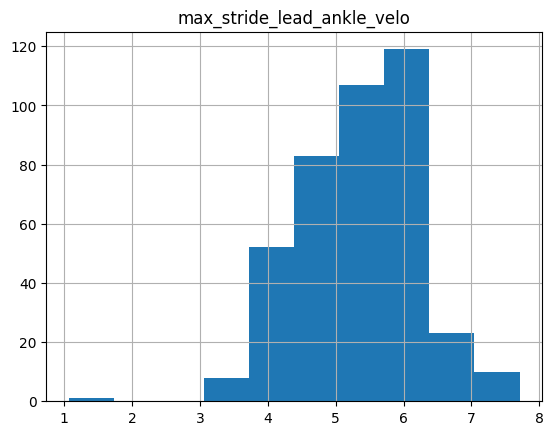

In [603]:
max_lead_ankle_velo.hist()

In [604]:
poi_train_new = poi_train_new.merge(max_lead_ankle_velo, on='session_pitch', how='left')

In [605]:
poi_val_new = poi_val_new.merge(max_lead_ankle_velo, on='session_pitch', how='left')

In [614]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8912399785437368
RMSE: 1.515036583008892


In [615]:
model = sm.OLS(mph_train, x_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        pitch_speed_mph   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     27.06
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           6.72e-21
Time:                        21:01:49   Log-Likelihood:                -125.14
No. Observations:                 257   AIC:                             686.3
Df Residuals:                      39   BIC:                             1460.
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
p_throws                                                                         1.2289      1.779      0.691      0.494      -2.370       4.828
max_shoulder_internal_rotational_velo                                            0.0053      0.011      0.485      0.630      -0.017       0.028
max_elbow_extension_velo                                                        -0.0092      0.024     -0.377      0.708      -0.058       0.040
max_torso_rotational_velo                                                       -0.0277      0.104     -0.267      0.791      -0.237       0.182
max_rotation_hip_shoulder_separation                                             0.9047      1.028      0.880      0.384      -1.174       2.984
max_elbow_flexion                                                                0.6793      1.207      0.563      0.577      -1.763       3.122
max_shoulder_external_rotation                                                  -0.3263      1.127     -0.290      0.774      -2.606       1.953
elbow_flexion_fp                                                                -0.9345      0.595     -1.571      0.124      -2.138       0.269
elbow_pronation_fp                                                              -0.0065      0.042     -0.155      0.878      -0.092       0.079
rotation_hip_shoulder_separation_fp                                             -1.3865      1.131     -1.225      0.228      -3.675       0.902
shoulder_horizontal_abduction_fp                                                -0.1628      0.242     -0.673      0.505      -0.652       0.327
shoulder_abduction_fp                                                            0.2887      0.628      0.460      0.648      -0.981       1.558
shoulder_external_rotation_fp                                                   -0.0426      0.075     -0.564      0.576      -0.195       0.110
lead_knee_extension_angular_velo_fp                                             -0.0041      0.003     -1.454      0.154      -0.010       0.002
lead_knee_extension_angular_velo_br                                             -0.0011      0.012     -0.091      0.928      -0.026       0.024
lead_knee_extension_angular_velo_max                                             0.0017      0.013      0.131      0.897      -0.025       0.029
torso_anterior_tilt_fp                                                          -0.0680      0.153     -0.444      0.660      -0.378       0.242
torso_lateral_tilt_fp                                                            0.0016      0.159      0.010      0.992      -0.320       0.324
torso_rotation_fp                     

In [616]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
114,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.409985
64,thorax_distal_transfer_fp_br,0.145249
92,shoulder_internal_rotation_moment_int_elbow_va...,0.050294
22,max_cog_velo_x,0.038629
44,max_shoulder_horizontal_abduction,0.026736
...,...,...
169,torso_rotation_mer_2,0.000000
168,torso_lateral_tilt_mer_2,0.000000
166,elbow_flexion_mer_2,0.000000
165,glove_shoulder_abduction_mer_2,0.000000


In [617]:
importance_df.head(10)

,Feature,Importance
114,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.409985
64,thorax_distal_transfer_fp_br,0.145249
92,shoulder_internal_rotation_moment_int_elbow_va...,0.050294
22,max_cog_velo_x,0.038629
44,max_shoulder_horizontal_abduction,0.026736
48,elbow_transfer_fp_br,0.024720
137,FP_to_BR_time_int_FS_to_BR_time,0.021707
105,lead_hip_transfer_fp_br_int_lead_knee_extensio...,0.019952
34,shoulder_internal_rotation_moment,0.019775
79,age_yrs,0.015291


In [618]:
importance_df.tail(10)

,Feature,Importance
174,torso_rotation_br_2,0.0
172,torso_anterior_tilt_br_2,0.0
163,glove_shoulder_abduction_fp_2,0.0
171,shoulder_internal_rotation_moment_2,0.0
170,elbow_varus_moment_2,0.0
169,torso_rotation_mer_2,0.0
168,torso_lateral_tilt_mer_2,0.0
166,elbow_flexion_mer_2,0.0
165,glove_shoulder_abduction_mer_2,0.0
179,arm_slot_2,0.0


Kind of suspected that much of the unimportant features would be the squared ones. Makes sense since we didn't put any thought into the individual squared features. Curious to see how many features we can take out without a drop in performance. 

In [619]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

In [620]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8912399785437368
RMSE: 1.515036583008892


In [621]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
167,cog_velo_pkh_2,0.0
168,stride_length_2,0.0
171,max_shoulder_horizontal_abduction_2,0.0
172,shoulder_transfer_fp_br_2,0.0
173,shoulder_generation_fp_br_2,0.0
174,shoulder_absorption_fp_br_2,0.0
175,elbow_transfer_fp_br_2,0.0
176,elbow_generation_fp_br_2,0.0
177,elbow_absorption_fp_br_2,0.0
139,max_elbow_extension_velo_2,0.0


In [622]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8912399785437368
RMSE: 1.515036583008892


In [623]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
159,torso_rotation_min_2,0.0
160,max_pelvis_rotational_velo_2,0.0
161,glove_shoulder_horizontal_abduction_fp_2,0.0
116,rear_grf_mag_max_int_rear_grf_x_max,0.0
168,lead_hip_transfer_fp_br_2,0.0
169,lead_hip_generation_fp_br_2,0.0
142,max_shoulder_external_rotation_2,0.0
171,lead_knee_transfer_fp_br_2,0.0
172,lead_knee_generation_fp_br_2,0.0
170,lead_hip_absorption_fp_br_2,0.0


In [624]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8912399785437368
RMSE: 1.515036583008892


In [625]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
149,lead_knee_extension_angular_velo_max_2,0.0
128,session_mass_kg_int_thorax_distal_transfer_fp_br,0.0
155,pelvis_rotation_fp_2,0.0
156,max_cog_velo_x_2,0.0
163,lead_knee_absorption_fp_br_2,0.0
139,max_rotation_hip_shoulder_separation_2,0.0
165,rear_hip_generation_pkh_fp_2,0.0
166,rear_hip_absorption_pkh_fp_2,0.0
167,rear_knee_transfer_pkh_fp_2,0.0
164,rear_hip_transfer_pkh_fp_2,0.0


In [626]:
for feature in importance_df.tail(10).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8912399785437368
RMSE: 1.515036583008892


In [627]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(20)

,Feature,Importance
175,session_height_m_2,0.0
176,age_yrs_2,0.0
177,playing_level_2,0.0
178,max_lead_knee_jc_z_2,0.0
166,rear_grf_angle_at_max_2,0.0
164,rear_grf_z_max_2,0.0
144,shoulder_external_rotation_fp_2,0.0
163,rear_grf_y_max_2,0.0
162,rear_grf_x_max_2,0.0
161,thorax_distal_transfer_fp_br_2,0.0


In [628]:
for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8912399785437368
RMSE: 1.515036583008892


In [629]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(20)

,Feature,Importance
49,elbow_generation_fp_br,2.763593e-07
144,glove_shoulder_external_rotation_fp_2,2.741445e-07
93,torso_anterior_tilt_br_int_torso_anterior_tilt...,2.042342e-07
103,elbow_absorption_fp_br_int_shoulder_generation...,1.933617e-07
97,lead_knee_extension_from_fp_to_br_int_lead_kne...,1.599666e-07
132,peak_knee_to_FS_time_int_cog_velo_pkh,1.131285e-07
139,torso_anterior_tilt_fp_2,9.977695e-08
90,pelvis_rotation_fp_int_torso_rotation_fp,6.969203e-08
51,lead_hip_transfer_fp_br,3.980902e-08
106,lead_knee_transfer_fp_br_int_lead_knee_extensi...,5.194404e-09


In [631]:
for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)



KeyError: "['elbow_generation_fp_br'] not found in axis"

In [636]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.891543122289233
RMSE: 1.5129237002821088


In [637]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [643]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.2)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8912071935440946
RMSE: 1.5152649147548802


In [644]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [652]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.18)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.9006870299025437
RMSE: 1.4477429626863259


In [653]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

for feature in importance_df.tail(20).Feature:
    x_train.drop(columns = feature, axis=1, inplace=True)
    x_val.drop(columns = feature, axis=1, inplace=True)


In [658]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.17)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8999324907831563
RMSE: 1.453232234041133


Let's stop here for now. That was 140 features dropped with better performance

In [659]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
9,shoulder_abduction_fp,0.000300
39,rear_hip_absorption_pkh_fp,0.000236
79,max_stride_lead_ankle_velo,0.000186
41,rear_knee_generation_pkh_fp,0.000179
21,elbow_flexion_mer,0.000156
76,pelvis_anterior_tilt_fp_2,0.000085
23,elbow_varus_moment,0.000050
63,stride_length_int_max_cog_velo_x,0.000042
72,lead_grf_mag_max_int_elbow_varus_moment,0.000013
65,max_shoulder_horizontal_abduction_int_shoulder...,0.000006


In [667]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.18)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8968202115243268
RMSE: 1.4756582629863466


Drop, double check the numbers above

In [668]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.tail(10)

,Feature,Importance
171,shoulder_internal_rotation_moment_2,0.0
169,torso_rotation_mer_2,0.0
161,max_pelvis_rotational_velo_2,0.0
168,torso_lateral_tilt_mer_2,0.0
167,torso_anterior_tilt_mer_2,0.0
166,elbow_flexion_mer_2,0.0
165,glove_shoulder_abduction_mer_2,0.0
163,glove_shoulder_abduction_fp_2,0.0
162,glove_shoulder_horizontal_abduction_fp_2,0.0
158,pelvis_rotation_fp_2,0.0


In [669]:
for feature in importance_df.tail(140).Feature:
    poi_train_new.drop(columns = feature, axis=1, inplace=True)
    poi_val_new.drop(columns = feature, axis=1, inplace=True)

In [678]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.17)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8999267685882958
RMSE: 1.453273783786948


In [679]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [680]:
importance_df[importance_df.Feature.str.contains('time')]

,Feature,Importance
76,FP_to_BR_time_int_FS_to_BR_time,0.033025
58,peak_knee_to_FS_time,0.003723
59,FP_to_BR_time,0.000891


In [681]:
importance_df.head(50)

,Feature,Importance
72,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.574793
45,thorax_distal_transfer_fp_br,0.073648
33,max_shoulder_horizontal_abduction,0.035507
76,FP_to_BR_time_int_FS_to_BR_time,0.033025
50,lead_grf_z_max,0.025188
55,age_yrs,0.023776
44,rear_knee_absorption_pkh_fp,0.016288
16,max_cog_velo_x,0.015090
79,stride_angle_2,0.012435
57,max_lead_knee_jc_z,0.011579


Just making some notes here. Only square feature here is stride angle, but this actually makes intuitive sense. Can see too little or too much being a factor. FS and FP are important enough. I'm weirded out by is that interaction term sitting at 4th most important.

Making a note here, but at the end, we may consider PCA. Only issue is the lack of interpretability for player development purposes. We can see how much it improves performance. Testin out where we are at the moment. Will do a proper grid search later.

In [709]:
linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.17)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8999267685882958
RMSE: 1.453273783786948


In [710]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
72,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.574793
45,thorax_distal_transfer_fp_br,0.073648
33,max_shoulder_horizontal_abduction,0.035507
76,FP_to_BR_time_int_FS_to_BR_time,0.033025
50,lead_grf_z_max,0.025188
...,...,...
65,stride_length_int_max_cog_velo_x,0.000140
10,lead_knee_extension_angular_velo_br,0.000103
60,rotation_hip_shoulder_separation_fp_int_max_ro...,0.000088
25,elbow_varus_moment,0.000026


In [711]:
importance_df[importance_df.Feature.str.contains('velo')]

,Feature,Importance
16,max_cog_velo_x,0.015090
64,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.010216
0,max_shoulder_internal_rotational_velo,0.004979
18,max_pelvis_rotational_velo,0.004368
61,lead_knee_extension_angular_velo_max_int_lead_...,0.002477
1,max_elbow_extension_velo,0.000880
2,max_torso_rotational_velo,0.000323
65,stride_length_int_max_cog_velo_x,0.000140
10,lead_knee_extension_angular_velo_br,0.000103


In [712]:
importance_df[importance_df.Feature.str.contains('max')]

,Feature,Importance
33,max_shoulder_horizontal_abduction,0.035507
50,lead_grf_z_max,0.025188
16,max_cog_velo_x,0.015090
57,max_lead_knee_jc_z,0.011579
64,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.010216
48,rear_grf_angle_at_max,0.006373
0,max_shoulder_internal_rotational_velo,0.004979
73,rear_grf_z_max_int_rear_grf_x_max,0.004933
18,max_pelvis_rotational_velo,0.004368
4,max_elbow_flexion,0.003307


In [713]:
# cog vs back foot x location at pkh and squared term, inter term between this and cog_velo_pkh
peak_leg_lift_time = peak_leg_lift_time.merge(landmarks, left_on=['session_pitch', 'peak_knee_time'], right_on=['session_pitch', 'time'], how='left')
peak_leg_lift_time

,session_pitch,max_lead_knee_jc_z,peak_knee_time,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,...,thorax_prox_z,centerofmass_x,centerofmass_y,centerofmass_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time
0,1031_2,1.1610,0.6250,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,...,1.5648,0.2251,-0.2640,1.1838,0.6250,1.1806,1.1917,1.3056,1.3389,1.3778
1,1031_3,1.1455,0.0917,0.0917,0.0852,-0.1224,0.0582,0.1449,-0.0365,0.9222,...,1.5666,0.2099,-0.1847,1.1787,0.0917,0.6639,0.6806,0.7917,0.8250,0.8611
2,1097_1,1.2528,0.1056,0.1056,0.0670,-0.0772,0.0572,0.1427,-0.0310,0.9547,...,1.5881,0.1702,-0.1675,1.2154,0.1056,0.7722,0.8278,0.9722,1.0028,1.0500
3,1097_2,1.3346,0.1722,0.1722,0.0687,-0.0722,0.0566,0.1128,-0.0512,0.9804,...,1.5998,0.1542,-0.1690,1.2428,0.1722,0.8528,0.8917,1.0306,1.0611,1.1083
4,1097_3,1.3434,0.1472,0.1472,0.0754,-0.0802,0.0574,0.1415,-0.0538,0.9762,...,1.5990,0.1653,-0.1679,1.2435,0.1472,0.8361,0.8472,1.0028,1.0306,1.0778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,1.1282,1.1250,1.1250,0.0894,-0.2624,0.0758,0.1335,-0.2528,0.9503,...,1.5268,0.1491,-0.3333,1.1662,1.1250,1.7556,1.7722,1.8861,1.9167,1.9500
407,3252_2,1.1912,0.8583,0.8583,0.0900,-0.2708,0.0770,0.1176,-0.2694,0.9507,...,1.5211,0.1437,-0.3413,1.1705,0.8583,1.5111,1.5250,1.6444,1.6722,1.7083
408,3252_3,1.1596,0.8944,0.8944,0.0842,-0.2321,0.0772,0.1442,-0.2016,0.9452,...,1.5131,0.1626,-0.2840,1.1615,0.8944,1.5306,1.5444,1.6583,1.6889,1.7250
409,3252_4,1.1912,0.6250,0.6250,0.0864,-0.2446,0.0764,0.1272,-0.2310,0.9554,...,1.5247,0.1523,-0.3079,1.1716,0.6250,1.2861,1.3083,1.4139,1.4444,1.4778


In [714]:
peak_leg_lift_time['cog_back_foot_diff_pkh'] = peak_leg_lift_time.centerofmass_x - peak_leg_lift_time.rear_ankle_jc_x

In [715]:
joint_angles.rear_knee_angle_x

0         27.8440
1         28.0164
2         28.1834
3         28.3388
4         28.4780
           ...   
247704    65.7704
247705    65.8856
247706    65.9629
247707    66.0106
247708    66.0372
Name: rear_knee_angle_x, Length: 247709, dtype: float64

In [716]:
peak_leg_lift_time = peak_leg_lift_time.merge(joint_angles[['session_pitch', 'time', 'rear_knee_angle_x']], on=['session_pitch', 'time'], how='left')

In [717]:
peak_leg_lift_time.rename(columns={'rear_knee_angle_x': 'rear_knee_angle_pkh'}, inplace=True)

In [718]:
cog_and_knee = peak_leg_lift_time[['session_pitch', 'cog_back_foot_diff_pkh', 'rear_knee_angle_pkh']]
poi_train_new = poi_train_new.merge(cog_and_knee, on='session_pitch', how='left')
poi_val_new = poi_val_new.merge(cog_and_knee, on='session_pitch', how='left')

In [763]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 10, reg_lambda = 1.23)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8848296813088318
RMSE: 1.5590453982408539


In [765]:
poi_train_new['cog_back_foot_diff_pkh_2'] = poi_train_new.cog_back_foot_diff_pkh**2
poi_train_new['rear_knee_angle_pkh_2'] = poi_train_new.rear_knee_angle_pkh**2

poi_val_new['cog_back_foot_diff_pkh_2'] = poi_val_new.cog_back_foot_diff_pkh**2
poi_val_new['rear_knee_angle_pkh_2'] = poi_val_new.rear_knee_angle_pkh**2

In [776]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 11, reg_lambda = 1.23)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8858885630744923
RMSE: 1.551861877370607


In [778]:
poi_train_new.drop(columns=['rear_knee_angle_pkh', 'rear_knee_angle_pkh_2'], inplace=True)
poi_val_new.drop(columns=['rear_knee_angle_pkh', 'rear_knee_angle_pkh_2'], inplace=True)

x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)


KeyError: "['rear_knee_angle_pkh', 'rear_knee_angle_pkh_2'] not found in axis"

In [785]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.15)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8972215534352828
RMSE: 1.4727855077880982


In [786]:
poi_train_new.drop(columns=['cog_back_foot_diff_pkh'], inplace=True)
poi_val_new.drop(columns=['cog_back_foot_diff_pkh'], inplace=True)

x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)


In [790]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.16)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8961520666311121
RMSE: 1.4804283955322837


In [791]:
poi_train_new.drop(columns=['cog_back_foot_diff_pkh_2'], inplace=True)
poi_val_new.drop(columns=['cog_back_foot_diff_pkh_2'], inplace=True)

x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)


In [802]:

linear_model = xgb.XGBRegressor(max_depth = 8, reg_lambda = 1.1699105)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8999356747693711
RMSE: 1.453209114108183


In [177]:
from sklearn.model_selection import GridSearchCV

In [818]:
poi_train_new_rear_knee = poi_train_new.merge(cog_and_knee[['session_pitch', 'rear_knee_angle_pkh']], on='session_pitch', how='left')
poi_val_new_rear_knee = poi_val_new.merge(cog_and_knee[['session_pitch', 'rear_knee_angle_pkh']], on='session_pitch', how='left')
poi_train_new_rear_knee['rear_knee_angle_pkh_2'] = poi_train_new_rear_knee.rear_knee_angle_pkh**2
poi_val_new_rear_knee['rear_knee_angle_pkh_2'] = poi_val_new_rear_knee.rear_knee_angle_pkh**2

x_train=poi_train_new_rear_knee.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new_rear_knee.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(max_depth = 12, reg_lambda = 1.19)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8965980171481226
RMSE: 1.4772462999484064


In [819]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(50)

,Feature,Importance
72,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.507789
45,thorax_distal_transfer_fp_br,0.124384
36,elbow_transfer_fp_br,0.039302
64,lead_knee_extension_from_fp_to_br_int_lead_kne...,0.029614
76,FP_to_BR_time_int_FS_to_BR_time,0.029166
33,max_shoulder_horizontal_abduction,0.019063
16,max_cog_velo_x,0.017428
48,rear_grf_angle_at_max,0.016289
79,stride_angle_2,0.015334
69,rear_knee_transfer_pkh_fp_int_rear_hip_transfe...,0.014683


The fact that there is rear_knee_absorption_pkh probably takes the effect away from rear_knee_angle_pkh. The former is likely a better indicator anyways, as it seems to be more important to the XGB. The presence of rear_knee_angle_pkh diminished the importance of absorption just a tad. Also diminishes performance. Not by much, but for something that may be unnecessary we don't want to take that trade.

In [835]:
x_train=poi_train_new.drop(columns=['session_pitch'], axis=1)
x_val = poi_val_new.drop(columns=['session_pitch'], axis=1)

linear_model = xgb.XGBRegressor(n_estimators = 60, max_depth = 8, reg_lambda = 1.17)
linear_model.fit(x_train, mph_train)

r_squared = linear_model.score(x_val, mph_val)
print('R^2: ' + str(r_squared))

predictions = linear_model.predict(x_val)
rmse = np.sqrt(mean_squared_error(mph_val, predictions))
print('RMSE: ' + str(rmse))

R^2: 0.8999267685882958
RMSE: 1.453273783786948


In [823]:
feature_importance = linear_model.feature_importances_
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(50)

,Feature,Importance
72,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.574793
45,thorax_distal_transfer_fp_br,0.073648
33,max_shoulder_horizontal_abduction,0.035507
76,FP_to_BR_time_int_FS_to_BR_time,0.033025
50,lead_grf_z_max,0.025188
55,age_yrs,0.023776
44,rear_knee_absorption_pkh_fp,0.016288
16,max_cog_velo_x,0.015090
79,stride_angle_2,0.012435
57,max_lead_knee_jc_z,0.011579


peak_knee_to_FS_time is decently important, FP_to_BR_time is meh. Gonna have to think about why FP_to_BR_time_int_FS_to_BR_time is so important. Good amount of interaction terms up here

In [838]:
importance_df

,Feature,Importance
72,thorax_distal_transfer_fp_br_int_elbow_transfe...,0.574793
45,thorax_distal_transfer_fp_br,0.073648
33,max_shoulder_horizontal_abduction,0.035507
76,FP_to_BR_time_int_FS_to_BR_time,0.033025
50,lead_grf_z_max,0.025188
...,...,...
65,stride_length_int_max_cog_velo_x,0.000140
10,lead_knee_extension_angular_velo_br,0.000103
60,rotation_hip_shoulder_separation_fp_int_max_ro...,0.000088
25,elbow_varus_moment,0.000026


Worth noting that we have less features than the original model.

In [853]:
for i, feature in enumerate(importance_df.head(20).Feature):
    if feature not in poi_train.columns:
        print(str(i+1) + ': ' + feature)

1: thorax_distal_transfer_fp_br_int_elbow_transfer_fp_br
4: FP_to_BR_time_int_FS_to_BR_time
9: stride_angle_2
10: max_lead_knee_jc_z
12: lead_knee_extension_from_fp_to_br_int_lead_knee_extension_angular_velo_max
14: shoulder_internal_rotation_moment_int_elbow_varus_moment
16: thorax_distal_transfer_fp_br_int_shoulder_internal_rotation_moment
17: arm_slot_int_torso_lateral_tilt_mer
18: lead_hip_transfer_fp_br_int_lead_knee_extension_from_fp_to_br
19: rear_knee_transfer_pkh_fp_int_rear_hip_transfer_pkh_fp


4 out of top 10 and 10 out of top 20 are new features. 9 out of these 10 are non-linear - 8 are interaction terms and 1 is a square term

In [841]:
importance_df[(importance_df.Feature.str.contains('hip')) | importance_df.Feature.str.contains('cog')]

,Feature,Importance
16,max_cog_velo_x,0.015090
68,lead_hip_transfer_fp_br_int_lead_knee_extensio...,0.008976
69,rear_knee_transfer_pkh_fp_int_rear_hip_transfe...,0.007244
38,lead_hip_absorption_fp_br,0.001989
7,rotation_hip_shoulder_separation_fp,0.001266
3,max_rotation_hip_shoulder_separation,0.001067
41,rear_hip_generation_pkh_fp,0.000297
42,rear_hip_absorption_pkh_fp,0.000242
65,stride_length_int_max_cog_velo_x,0.000140
60,rotation_hip_shoulder_separation_fp_int_max_ro...,0.000088


Going to see how the cog position in the plane perpendicular to home effects velo here. Idea is seeing how someone is sitting into their rear leg. Also worth trying the hip position. We already tried the relative position to the ankle for cog in the x direction, so now we can try in the y direction. One thing to note is the rear_hip_absorption_pkh_fp might be covering this, but it is a pretty insignificant feature to the model.

In [842]:
pkh_FP_landmarks

,session_pitch,time,rear_ankle_jc_x,rear_ankle_jc_y,rear_ankle_jc_z,rear_hip_x,rear_hip_y,rear_hip_z,elbow_jc_x,elbow_jc_y,...,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,lead_ankle_velo,prev_time,next_time,ankle_dist
0,1031_2,0.6250,0.0854,-0.1637,0.0588,0.1763,-0.1076,0.9253,-0.1232,-0.3015,...,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,NaN,NaN,0.6278,NaN
1,1031_2,0.6278,0.0855,-0.1638,0.0588,0.1785,-0.1074,0.9245,-0.1219,-0.3016,...,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.151751,0.6250,0.6306,0.006450
2,1031_2,0.6306,0.0855,-0.1638,0.0589,0.1807,-0.1075,0.9236,-0.1207,-0.3016,...,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.192955,0.6278,0.6333,0.006561
3,1031_2,0.6333,0.0856,-0.1639,0.0589,0.1830,-0.1076,0.9227,-0.1194,-0.3017,...,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.235695,0.6306,0.6361,0.006796
4,1031_2,0.6361,0.0857,-0.1639,0.0590,0.1853,-0.1079,0.9218,-0.1182,-0.3017,...,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,1.240525,0.6333,0.6389,0.006947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94025,3252_5,1.4167,0.1799,-0.2928,0.0891,0.8278,-0.1410,0.6287,0.6784,0.1869,...,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,1.496221,1.4139,1.4194,0.008229
94026,3252_5,1.4194,0.1840,-0.2928,0.0907,0.8347,-0.1449,0.6280,0.6765,0.1815,...,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,1.456703,1.4167,1.4222,0.008012
94027,3252_5,1.4222,0.1883,-0.2925,0.0925,0.8417,-0.1489,0.6272,0.6743,0.1753,...,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,1.395716,1.4194,1.4250,0.007816
94028,3252_5,1.4250,0.1926,-0.2922,0.0945,0.8487,-0.1530,0.6265,0.6717,0.1683,...,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,1.303816,1.4222,1.4278,0.007301
